# **Ejercicio: Análisis y Visualización de Datos desde un CSV**

### Prof. Andrés Mena Abarca

**Objetivo:**  
Leer datos de un archivo CSV, realizar un análisis exploratorio y crear diferentes gráficos para visualizar la información utilizando Pandas y Matplotlib.

# Estudiante: Gerald D. Chaves

In [1]:
# Importar la biblioteca pandas, que se utiliza para manipular y analizar datos estructurados.
import pandas as pd

# Definir la ruta del archivo CSV que contiene los datos.
# Aquí se especifica el nombre del archivo (puede ser relativo o absoluto).
ruta_archivo_csv = "nacimientos_defunciones.csv"

# Leer el archivo CSV en un DataFrame de pandas.
# El parámetro `delimiter=','` indica que las columnas están separadas por comas (formato CSV estándar).
df = pd.read_csv(ruta_archivo_csv, delimiter=',')

# Mostrar el contenido del DataFrame cargado.
# Esto permite visualizar los datos en forma tabular (filas y columnas).
df


,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713
...,...,...,...
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292
70,2020,57848,26205


## **Limpiar y procesar el DataFrame**

El DataFrame `df` tiene las siguientes columnas:

- **Año**: Esta columna contiene los años correspondientes a los registros demográficos.
- **Nacimientos**: Esta columna contiene la cantidad de nacimientos registrados en el año.
- **Defunciones**: Esta columna contiene la cantidad de defunciones registradas en el año.
- **Unnamed: x**: (si existieran columnas adicionales) Estas columnas contienen datos no deseados o nulos y deben ser eliminadas para limpiar el DataFrame.

### **Pasos para la limpieza y procesamiento:**

1. **Eliminar columnas innecesarias**: Si hay columnas como `Unnamed: x`, eliminarlas del DataFrame.
2. **Eliminar filas nulas o no válidas**: Asegurarse de que los valores en las columnas relevantes no contengan datos faltantes.
3. **Convertir los datos a tipos adecuados**: Verificar y convertir las columnas numéricas a su formato correcto (por ejemplo, `int` o `float` para los valores numéricos).
4. **Guardar el DataFrame limpio**: Exportar el resultado a un nuevo archivo CSV para análisis posterior.

In [2]:
print('Shape: ',df.shape)
print('Columnas: ', df.columns)
print('Tipado: \n', df.dtypes)

Shape:  (72, 3)
Columnas:  Index(['Año', 'Nacimientos', 'Defunciones'], dtype='object')
Tipado: 
 Año            int64
Nacimientos    int64
Defunciones    int64
dtype: object


In [3]:
# Eliminar filas con valores nulos en cualquier columna
df.dropna(inplace=True)

df.head()

,Año,Nacimientos,Defunciones
0,1950,37248,9769
1,1951,39239,9631
2,1952,42461,9902
3,1953,42817,10312
4,1954,48157,9713


### **1\. Gráfico de líneas: Nacimientos y Defunciones por año**

### 

Este gráfico muestra la tendencia de nacimientos y defunciones a lo largo de los años.

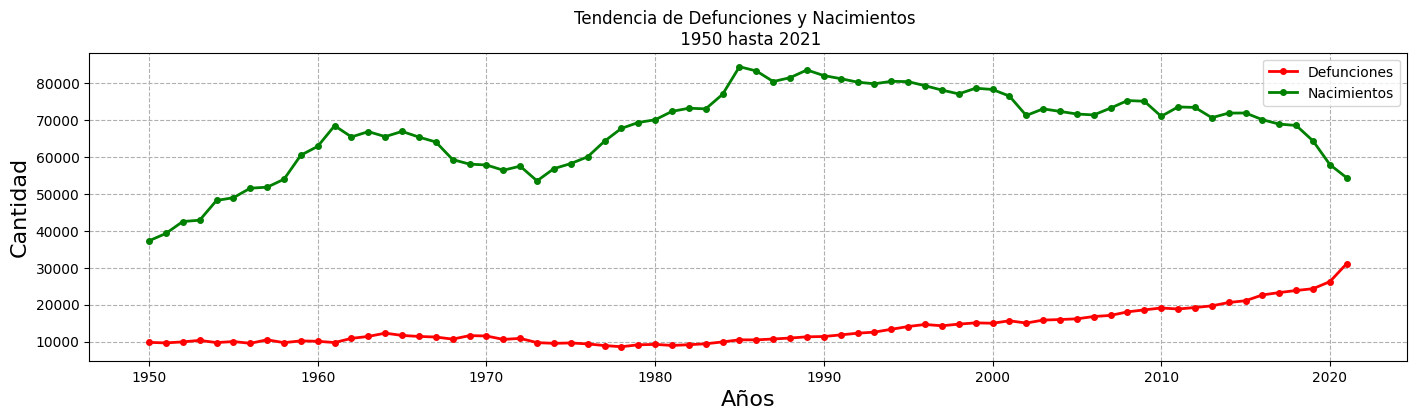

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize = (17,4))
#el eje Y defunciones
#Eje X anios

plt.plot(df['Año'],df['Defunciones'],marker='o',markersize="4",lw=2, color='red',label='Defunciones')
plt.plot(df['Año'],df['Nacimientos'],marker='o',markersize="4",lw=2, color='green',label='Nacimientos')

plt.grid(linestyle='--') #linegrid crea rejillas

plt.title(f'Tendencia de Defunciones y Nacimientos \n {df['Año'].min()} hasta {df['Año'].max()}')
plt.xlabel("Años", fontsize=16)
plt.ylabel("Cantidad", fontsize=16)
plt.legend()

#los data frames tienen multiples columnas entonces yo debo decirle quien es X y Y, debo de ser ordenada con los ejes, primero va Y y luego X
#biblioteca para hacer lineas de tendencia en una grafica seaborn

### **2\. Selección y Filtrado de Datos**

**Objetivo:** Practicar la selección de columnas y el filtrado de filas.

1. **Seleccionar columnas específicas:**

In [5]:
# Seleccionar las columnas de Año y Nacimientos
filtro = ['Año', 'Nacimientos']
df[filtro]

,Año,Nacimientos
0,1950,37248
1,1951,39239
2,1952,42461
3,1953,42817
4,1954,48157
...,...,...
67,2017,68811
68,2018,68449
69,2019,64274
70,2020,57848


In [6]:
# Filtrar datos desde el año 2010

#opcion 1
df_filtrado = df[df['Año']>= 2010]
df_filtrado

#opcion 2
#df_filtrado = df.loc[df['Año' >= 2010]]

,Año,Nacimientos,Defunciones
60,2010,70922,19077
61,2011,73459,18801
62,2012,73326,19200
63,2013,70550,19646
64,2014,71793,20560
65,2015,71819,21038
66,2016,70004,22601
67,2017,68811,23246
68,2018,68449,23806
69,2019,64274,24292


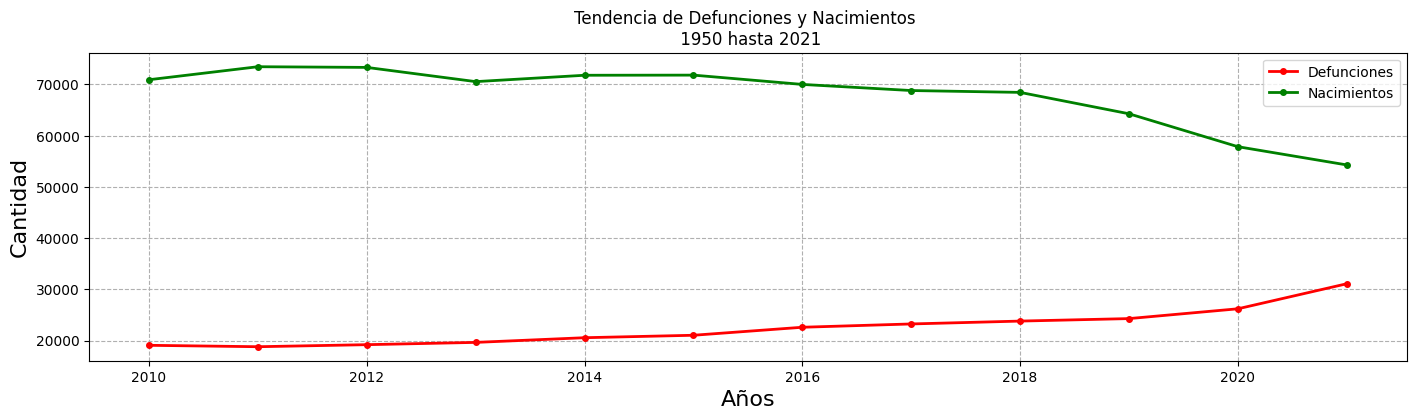

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize = (17,4))
#el eje Y defunciones
#Eje X anios

plt.plot(df_filtrado['Año'],df_filtrado['Defunciones'],marker='o',markersize="4",lw=2, color='red',label='Defunciones')
plt.plot(df_filtrado['Año'],df_filtrado['Nacimientos'],marker='o',markersize="4",lw=2, color='green',label='Nacimientos')

plt.grid(linestyle='--') #linegrid crea rejillas

plt.title(f'Tendencia de Defunciones y Nacimientos \n {df['Año'].min()} hasta {df['Año'].max()}')
plt.xlabel("Años", fontsize=16)
plt.ylabel("Cantidad", fontsize=16)
plt.legend()

### **3\. Operaciones Básicas**

**Objetivo:** Realizar cálculos básicos utilizando las columnas del DataFrame.

1. **Calcular el total de nacimientos y defunciones:**

In [8]:

# total_nacimientos
total_nacimientos = df['Nacimientos'].sum()
# total_defunciones 
total_defunciones = df['Defunciones'].sum() #puede ser mean o lo que se pida

print(f'Total de nacimientos: {total_nacimientos}')
print(f'Total de defunciones: {total_defunciones}')

Total de nacimientos: 4846207
Total de defunciones: 975501


**2\. Añadir una nueva columna con el saldo poblacional :**

In [9]:

# total_nacimientos
total_nacimientos = df['Nacimientos'].sum()
# total_defunciones 
total_defunciones = df['Defunciones'].sum() #puede ser mean o lo que se pida

print(f'Total de nacimientos: {total_nacimientos}')
print(f'Total de defunciones: {total_defunciones}')

Total de nacimientos: 4846207
Total de defunciones: 975501


### **Creación de Gráficos con Matplotlib**

**Objetivo:** Introducir la visualización básica de datos con Matplotlib.

1. **Gráfico de líneas: Nacimientos por año**

In [17]:
import matplotlib.pyplot as plt

anio_inicial = int(input('Ingrese el año inicial: '))
anio_final = int(input('Ingrese el año Final: '))

#df >= anio_inicial and <= anio_final
                                            #  and
df_rango_anios = df[((df['Año']>= anio_inicial) & (df['Año'] <= anio_final))]

df_rango_anios

,Año,Nacimientos,Defunciones
50,2000,78178,14944
51,2001,76401,15609
52,2002,71144,15004
53,2003,72938,15800
54,2004,72247,15949
55,2005,71548,16139


<function matplotlib.pyplot.show(close=None, block=None)>

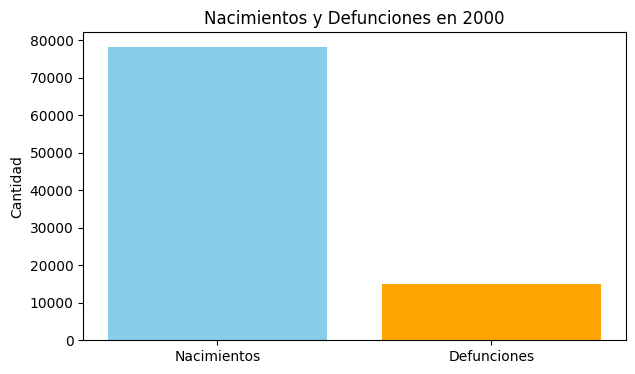

In [19]:
anio_filtrar = int(input('Ingrese el año a Graficar: '))

#df >= anio_inicial and <= anio_final
import matplotlib.pyplot as plt
             #  and
df_rango_anios = df[df['Año'] == anio_filtrar ]

plt.figure(figsize=(7,4))
plt.bar(['Nacimientos','Defunciones'], [df_rango_anios['Nacimientos'].values[0],
        df_rango_anios['Defunciones'].values[0]], color=['skyblue','orange'])

plt.title(f"Nacimientos y Defunciones en {df_rango_anios['Año'].values[0]}")
plt.ylabel('Cantidad')
plt.show

### **Gráfico de barras: Comparación de nacimientos y defunciones**

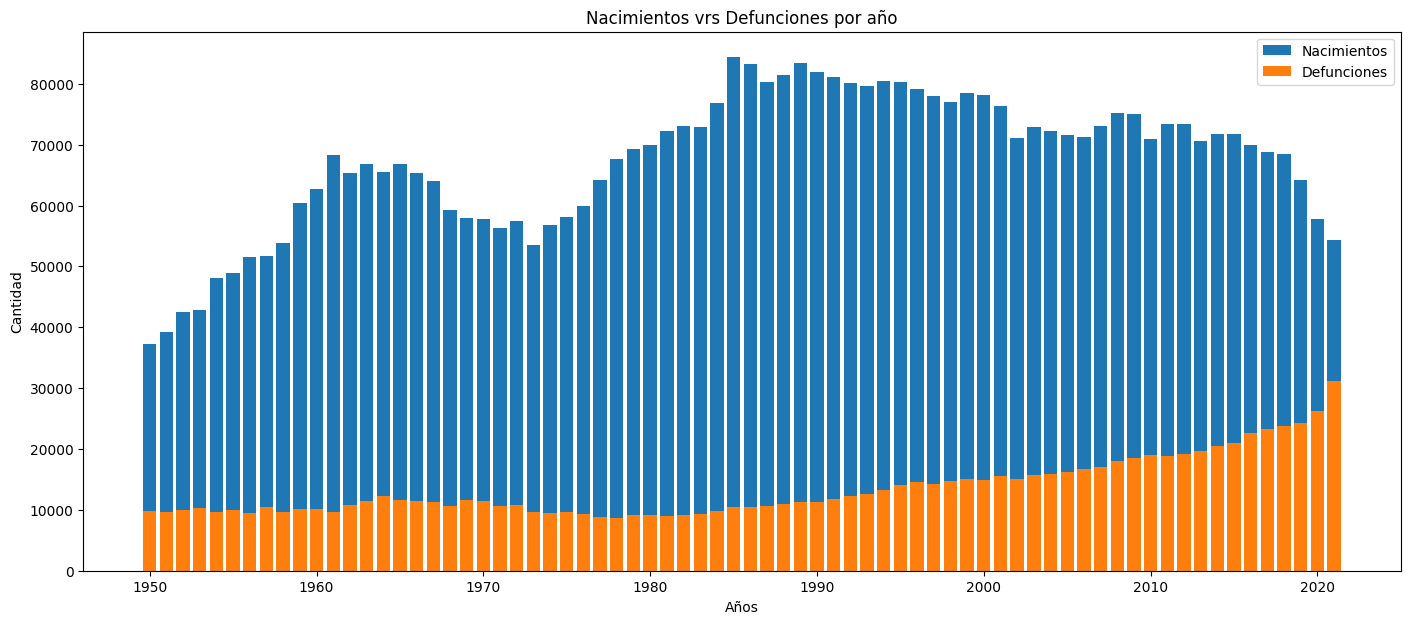

In [20]:
# Crear gráfico de barras
plt.figure(figsize=(17,7))
plt.bar(df['Año'],df['Nacimientos'],label = 'Nacimientos')
plt.bar(df['Año'],df['Defunciones'],label='Defunciones')

plt.title('Nacimientos vrs Defunciones por año')


plt.xlabel('Años')
plt.ylabel('Cantidad')
plt.legend()
plt.show()

In [21]:
# Filtrar datos del último año
ultimo_anio = df[df['Año'] == df['Año'].max()]
ultimo_anio

,Año,Nacimientos,Defunciones
71,2021,54288,31093


### **<mark>TAREA SEMANA 12</mark>**

**Objetivo:** Combinar la manipulación de datos con visualización.

#### **Enunciado:**

1. Filtra los datos desde el año 2000.
2. Calcula el promedio de nacimientos y defunciones desde esa fecha.
3. Crea un gráfico de líneas que compare nacimientos y defunciones desde el año 2000.

#### **Solución:**

1. **Filtrar datos desde el año 2000:**

In [22]:
df_filtrado = df[(df['Año'] >= 2000) & (df['Año'] <= 2010)]
df_filtrado.head()

,Año,Nacimientos,Defunciones
50,2000,78178,14944
51,2001,76401,15609
52,2002,71144,15004
53,2003,72938,15800
54,2004,72247,15949


2. **Calcular promedios:**

In [23]:
df_filtrado = df[df['Año'] >= 2020]
promedio_nacimientos = df_filtrado['Nacimientos'].mean()
promedio_defunciones = df_filtrado['Defunciones'].mean()

print(f'El promedio de nacimientos a partir del 2010 es de {promedio_nacimientos:.2f}')
print(f'El promedio de defunciones a partir del 2010 es de {promedio_defunciones:.2f}')#

El promedio de nacimientos a partir del 2010 es de 56068.00
El promedio de defunciones a partir del 2010 es de 28649.00


3. **Graficar:**

C:\Users\geral\AppData\Local\Temp\ipykernel_7324\3314477058.py:15: MatplotlibDeprecationWarning: Passing the explode parameter of pie() positionally is deprecated since Matplotlib 3.9; the parameter will become keyword-only in 3.11.
  plt.pie(data,[0,0.1], eje_x, color, autopct='%1.1f%%', startangle= 90)


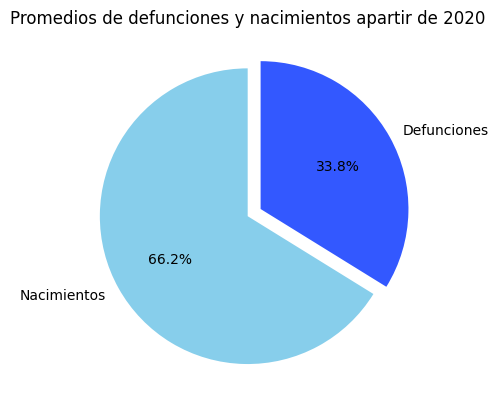

In [24]:
#
df_filtrado = df[df['Año'] >= 2020]
promedio_nacimientos = df_filtrado['Nacimientos'].mean()
promedio_defunciones = df_filtrado['Defunciones'].mean()



eje_x = ['Nacimientos','Defunciones'] #Etiquetas
data = [promedio_nacimientos,promedio_defunciones]



color = ['skyblue', '#3358ff']

plt.pie(data,[0,0.1], eje_x, color, autopct='%1.1f%%', startangle= 90)
plt.title('Promedios de defunciones y nacimientos apartir de 2020')
plt.show()